# Predicting Health Insurance - Final Assignment

Introduction to Data Science

Group: Michał Dawid Kowalski, Santiago Romero Pineda, Natalia Pludra

## Summary of the Notebook
### Motivation and Business Questions

This project is driven by the crucial need to identify customers who currently lack health insurance. Accurately predicting uninsured customers empowers the company to strategically allocate resources and tailor marketing strategies that effectively encourage insurance adoption. By understanding the demographic and economic factors influencing health insurance coverage, we can gain valuable insights to address service delivery gaps and enhance outreach efforts.

This project seeks to answer the following key business questions:
*   Customer Profiling: What are the primary
characteristics (e.g., age, income, employment status) that distinguish customers without health insurance?
*   Predictive Factors: Which customer attributes exhibit the strongest predictive power in determining whether a customer has insurance or not?
*   Targeted Outreach: How can the developed predictive model be leveraged to design targeted outreach or marketing campaigns specifically for customers who are likely uninsured?
*   Impact Assessment: What is the anticipated impact of improved predictions on insurance adoption rates and overall business outcomes?




### Modeling Results

This results are being evalueated with F1-score

| Model | Target | Oversampling | SMOTE | Non-balanced |
|---|---|---|---|---|
| Nearest Neighbor | YES | 0.77 | 0.89 | 0.88 |
|  | NO  | 0.28 | 0.23 | 0.10 |
| Bayesian Classifier | YES | 0.63 | 0.63 | 0.69 |
|  | NO  | 0.24 | 0.24 | 0.25 |
| Decision Trees | YES | 0.79 | 0.91 | 0.70 |
|  | NO  | 0.31 | 0.27 | 0.08 |
| Random Forest | YES | 0.81 | 0.95 | 0.96 |
|  | NO  | 0.33 | 0.20 | 0.12 |
| Support Vector Machine | YES | 0.79 | 0.83 | 0.84 |
|  | NO  | 0.32 | 0.32 | 0.06 |
| Neural Network Classifier | YES | 0.80 | 0.82 | 0.90 |
|  | NO  | 0.31 | 0.33 | 0.04 |
| XGBoost | YES | 0.81 | 0.93 | 0.95 |
|  | NO  | 0.34 | 0.31 | 0.46 |


1. Impact of Oversampling and SMOTE:

*   Oversampling and SMOTE generally improve performance: Both techniques seem to enhance the model's ability to predict the minority class (Target = 1). This is particularly evident in models like Random Forest and XGBoost, where the F1-score for the minority class significantly improves with these techniques.
*   SMOTE often outperforms Oversampling: In many cases, SMOTE yields slightly better results, especially for models like Neural Networks.

2. Model Performance Comparison:

*   Random Forest and XGBoost: These models consistently perform well, especially when combined with oversampling or SMOTE.
*   Neural Networks: While neural networks can be powerful, their performance in this case is more sensitive to class imbalance.
*   Nearest Neighbor and Bayesian Classifier: These models seem to be less effective in handling class imbalance, even with oversampling or SMOTE.




## 1. Exploratory Data Analysis (EDA)

#### EDA summary:

1. Data Distribution:
*   Income: The income distribution is right-skewed, with a majority of people concentrated in the lower income category. A few outliers with extremely high incomes were observed.
*   State of residence: The distribution of individuals across states of residence is uneven, with some states having a higher concentration of individuals than others.
*   Categorical features: Categorical variables such as gender, employment status, marital status, housing type, etc., exhibit varying distributions and frequencies.


2. Correlations:
*   Income and age: There is a moderate positive correlation between age and income, indicating that income tends to increase with age.
*   Income and employment status: Employed individuals tend to have higher incomes than unemployed individuals.
*   Health insurance and age: The probability of having health insurance increases with age.
* On the binary scatter plot we observe that the probability that a person has an insurance increases with age.
This information leads to a conclusion that Age feature is crucial to prediction.


3. Outliers:

*   Income: Outliers were observed in the income variable, which may affect some machine learning models.
*   Age: Outliers were identified in the age variable, such as individuals younger than 18 years old and individuals older than 100 yeas old.

4. Relationships between Variables:

*   Gas usage and housing type: Gas usage varies based on housing type, with single-family homes exhibiting higher usage compared to apartments.
*   Income and marital status: Married individuals tend to have higher incomes than single individuals.
*   Health insurance and marital status: Married individuals have a higher probability of having health insurance than single individuals.


In [ ]:
from google.colab import files

uploaded = files.upload()

Saving customer.csv to customer.csv


In [ ]:
# Import key libraries for EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1.1 Raw Data Analysis & Visualisation

In [ ]:
# Read csv file
df = pd.read_csv('customer.csv')
df.head(3)

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,7,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,8,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,9,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F


In [ ]:
# Drop Unnamed: 0 column, reason - wrong indexing
df.drop('Unnamed: 0', axis=1, inplace= True)
df.head(5)

,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,000006646_03,Male,True,22000.0,Never married,True,Homeowner free and clear,0.0,24,Alabama,1047,210.0,3,F
1,000007827_01,Female,NaN,23200.0,Divorced/Separated,True,Rented,0.0,82,Alabama,1047,3.0,6,T
2,000008359_04,Female,True,21000.0,Never married,True,Homeowner with mortgage/loan,2.0,31,Alabama,1047,40.0,3,F
3,000008529_01,Female,NaN,37770.0,Widowed,True,Homeowner free and clear,1.0,93,Alabama,1047,120.0,2,F
4,000008744_02,Male,True,39000.0,Divorced/Separated,True,Rented,2.0,67,Alabama,1047,3.0,2,F


In [ ]:
# Dataset basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72458 entries, 0 to 72457
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custid          72458 non-null  object 
 1   sex             72458 non-null  object 
 2   is_employed     46943 non-null  object 
 3   income          72458 non-null  float64
 4   marital_status  72458 non-null  object 
 5   health_ins      72458 non-null  bool   
 6   housing_type    70772 non-null  object 
 7   num_vehicles    70772 non-null  float64
 8   age             72458 non-null  int64  
 9   state_of_res    72458 non-null  object 
 10  code_column     72458 non-null  int64  
 11  gas_usage       70772 non-null  float64
 12  rooms           72458 non-null  int64  
 13  recent_move_b   70771 non-null  object 
dtypes: bool(1), float64(3), int64(3), object(7)
memory usage: 7.3+ MB


In [ ]:
# Dataset shape and size
print(f'Dataframe shape: {df.shape}')
print(f'Dataframe size: {df.size}')

Dataframe shape: (72458, 14)
Dataframe size: 1014412


In [ ]:
# Atributes types
print(f'Features types:\n {df.dtypes}')

Features types:
custid             object
sex                object
is_employed        object
income            float64
marital_status     object
health_ins           bool
housing_type       object
num_vehicles      float64
age                 int64
state_of_res       object
code_column         int64
gas_usage         float64
rooms               int64
recent_move_b      object
dtype: object


In [ ]:
# Statistical characteristics of numerical atributes
df.describe()

,income,num_vehicles,age,code_column,gas_usage,rooms
count,7.245800e+04,70772.000000,72458.000000,72458.000000,70772.000000,72458.000000
mean,4.188143e+04,2.066820,49.208893,3285.523572,41.230501,3.494549
std,5.827460e+04,1.170076,18.090035,2661.775225,63.149323,1.706537
min,-6.900000e+03,0.000000,0.000000,131.000000,1.000000,1.000000
25%,1.070000e+04,1.000000,34.000000,1305.000000,3.000000,2.000000
50%,2.640000e+04,2.000000,48.000000,2269.000000,10.000000,3.000000
75%,5.200000e+04,3.000000,62.000000,4979.000000,60.000000,5.000000
max,1.257000e+06,6.000000,120.000000,8962.000000,570.000000,6.000000


In [ ]:
# Characteristics of categorical atributes
df.describe(include=[object])

,custid,sex,is_employed,marital_status,housing_type,state_of_res,recent_move_b
count,72458,72458,46943,72458,70772,72458,70771
unique,72458,2,2,4,4,51,2
top,000006646_03,Female,True,Married,Homeowner with mortgage/loan,California,F
freq,1,37461,44630,38040,31092,8870,61773


In [ ]:
# Missing values
print(f'Number of missing values:\n{df.isnull().sum()}')

Number of missing values:
custid                0
sex                   0
is_employed       25515
income                0
marital_status        0
health_ins            0
housing_type       1686
num_vehicles       1686
age                   0
state_of_res          0
code_column           0
gas_usage          1686
rooms                 0
recent_move_b      1687
dtype: int64


In [ ]:
# Precentage of missing values
print(f'Missing values (precentage):\n{df.isnull().mean() * 100}')

Missing values (precentage):
custid             0.000000
sex                0.000000
is_employed       35.213503
income             0.000000
marital_status     0.000000
health_ins         0.000000
housing_type       2.326865
num_vehicles       2.326865
age                0.000000
state_of_res       0.000000
code_column        0.000000
gas_usage          2.326865
rooms              0.000000
recent_move_b      2.328245
dtype: float64


In [ ]:
# Duplicates
df[df.duplicated()]

,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b


In [ ]:
# Unique values counts
for col in df.columns.to_list():
    print(f'{df[col].value_counts()}')

custid
000006646_03    1
000634622_01    1
000636010_02    1
000635792_01    1
000635655_02    1
               ..
000920525_01    1
000920861_01    1
000921201_01    1
000922329_01    1
001520877_01    1
Name: count, Length: 72458, dtype: int64
sex
Female    37461
Male      34997
Name: count, dtype: int64
is_employed
True     44630
False     2313
Name: count, dtype: int64
income
0.0         6691
30000.0     1650
20000.0     1394
40000.0     1390
50000.0     1357
            ... 
269000.0       1
9910.0         1
23120.0        1
35060.0        1
26850.0        1
Name: count, Length: 4445, dtype: int64
marital_status
Married               38040
Never married         19120
Divorced/Separated    10572
Widowed                4726
Name: count, dtype: int64
health_ins
True     65553
False     6905
Name: count, dtype: int64
housing_type
Homeowner with mortgage/loan    31092
Rented                          21956
Homeowner free and clear        16604
Occupied with no rent            1120
Name:

### 1.2 Data Visualization

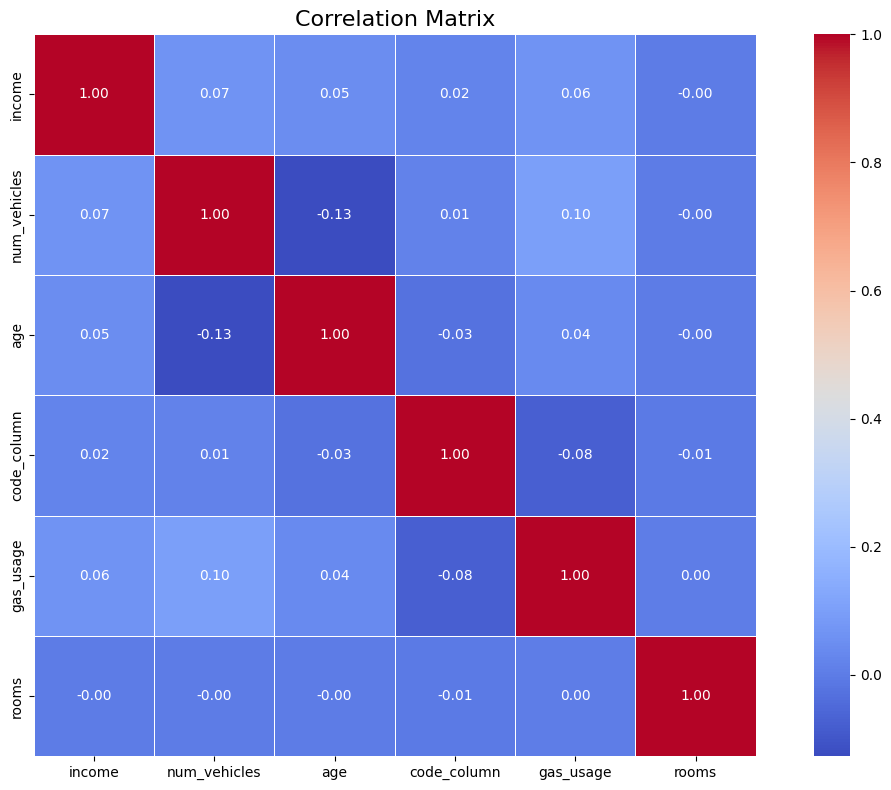

In [ ]:
# Features correlations (numerical features)
numerical_df = df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',
    linewidths=0.7,
    square=True,
)

plt.title('Correlation Matrix', fontsize=16)

plt.tight_layout()
plt.show()

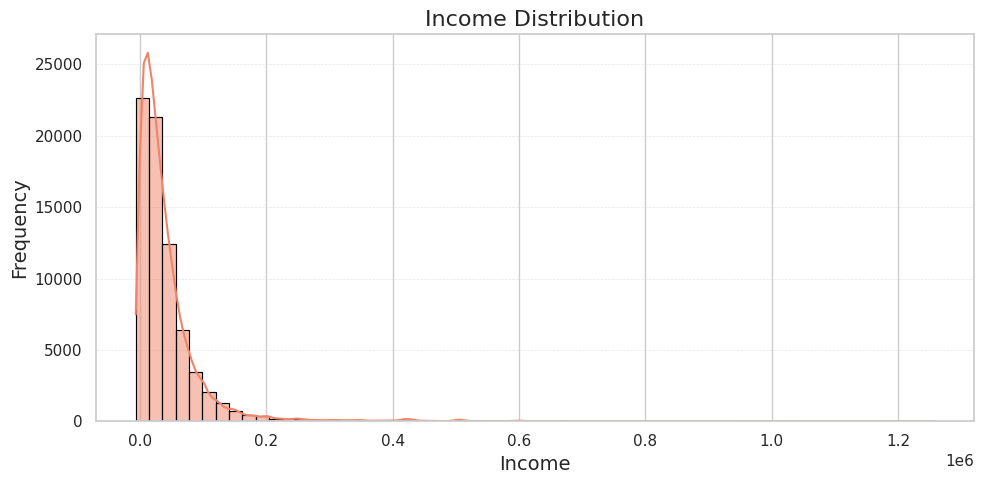

In [ ]:
# Income histogram plot
plt.figure(figsize=(10, 5))  # Set the figure size

sns.histplot(df['income'], bins=60, kde=True, color=sns.color_palette('coolwarm', as_cmap=True)(0.8), edgecolor='black')

plt.title('Income Distribution', fontsize=16)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

<ipython-input-48-ece78469291a>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='state_of_res', palette='coolwarm')


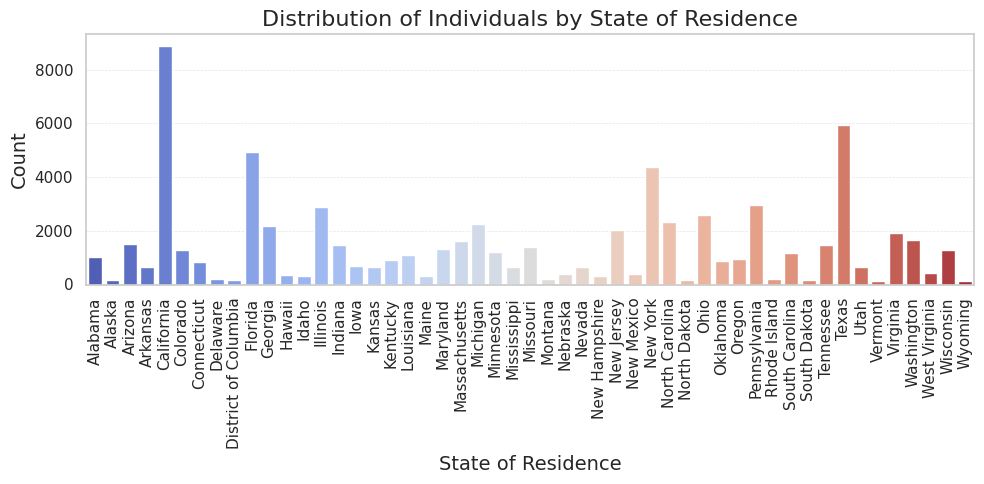

In [ ]:
# Distribution of states
plt.figure(figsize=(10, 5))

sns.countplot(data=df, x='state_of_res', palette='coolwarm')

plt.title('Distribution of Individuals by State of Residence', fontsize=16)
plt.xlabel('State of Residence', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=90)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

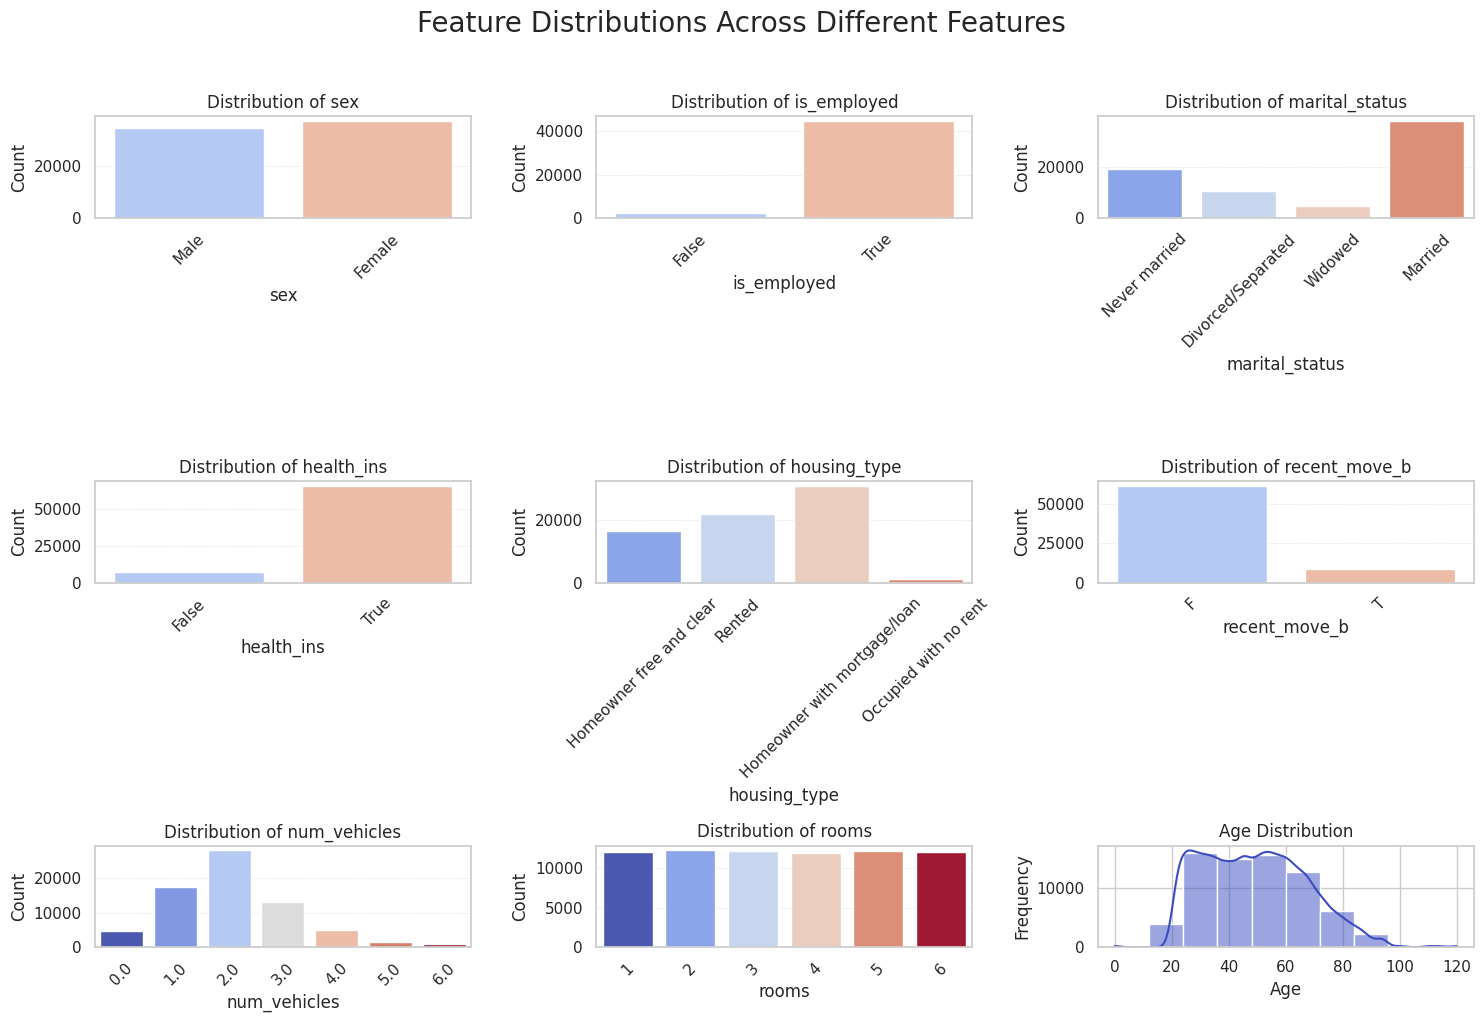

In [ ]:
# Count plots for features
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

axes = axes.flatten()

categorical_columns = [
    'sex', 'is_employed', 'marital_status',
    'health_ins', 'housing_type', 'recent_move_b',
    'num_vehicles', 'rooms'
]

# Plot bar charts for categorical variables
for i, col in enumerate(categorical_columns):
    sns.countplot(data=df, x=col, ax=axes[i], hue=col, palette='coolwarm', legend=False)  # Using 'Blues' palette
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].grid(linestyle='--', linewidth=0.5, alpha=0.5, axis='y')

# Plot histogram for age
sns.histplot(df['age'], bins=10, kde=True, ax=axes[len(categorical_columns)], color=sns.color_palette('coolwarm', as_cmap=True)(-0.8))  # Using a color from the 'coolwarm' palette
axes[len(categorical_columns)].set_title('Age Distribution')
axes[len(categorical_columns)].set_xlabel('Age')
axes[len(categorical_columns)].set_ylabel('Frequency')

plt.suptitle('Feature Distributions Across Different Features', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

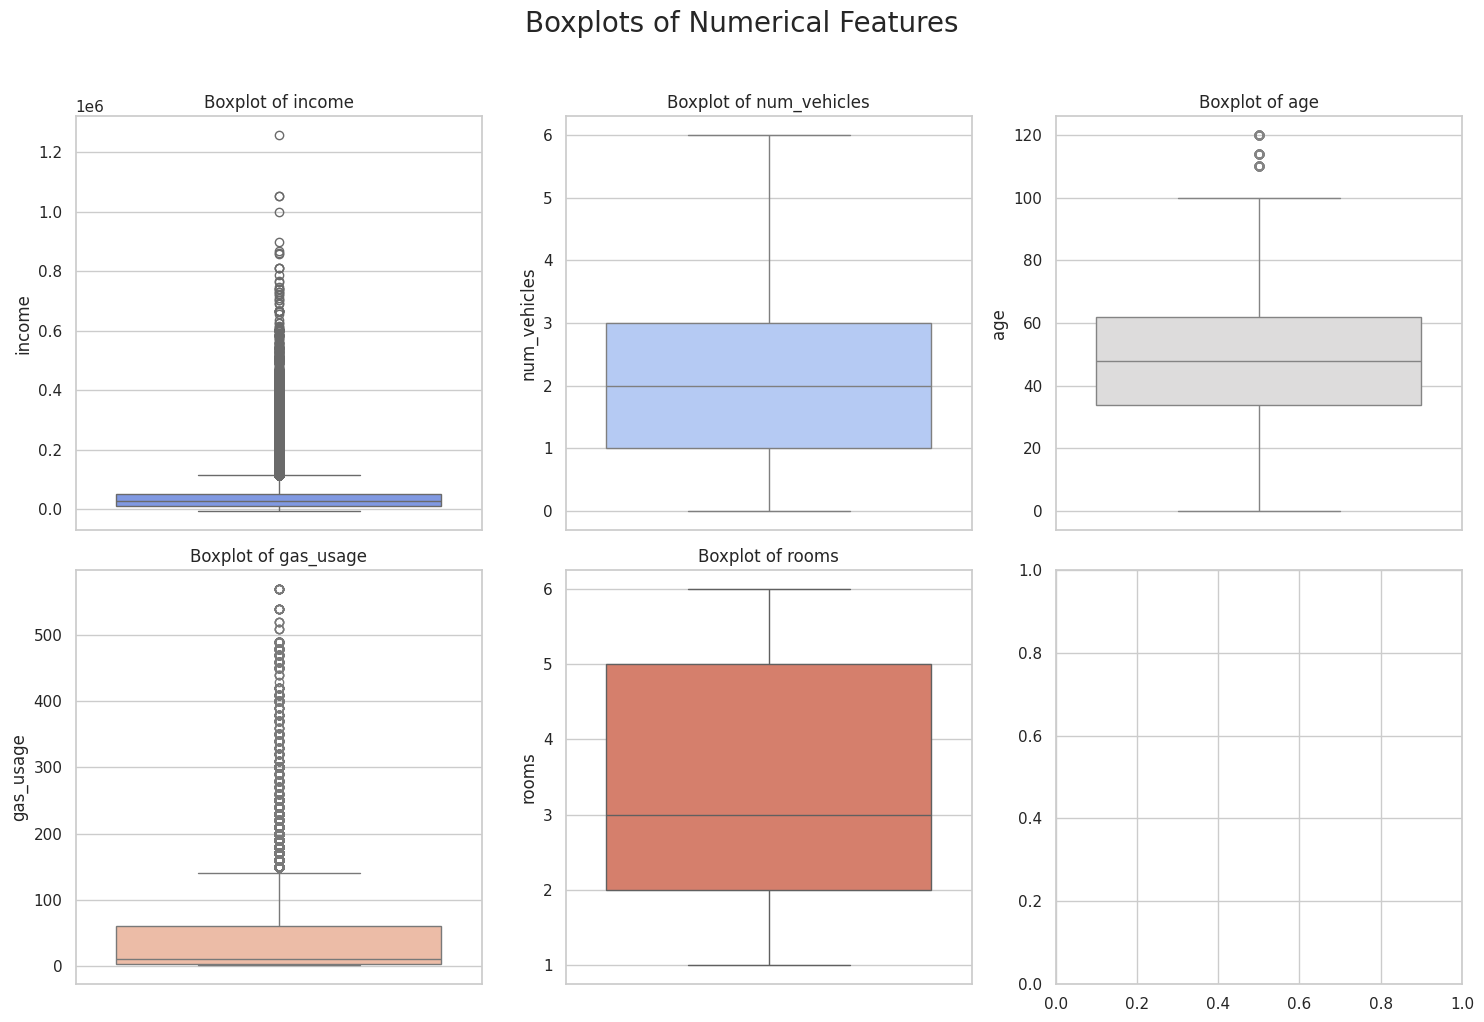

In [ ]:
# Features boxplots to check distirbution and outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
numerical_columns = ['income', 'num_vehicles', 'age', 'gas_usage', 'rooms']

# Plot bar charts for categorical variables
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=df, y=col, ax=axes[i], color=sns.color_palette("coolwarm", len(numerical_columns))[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_ylabel(col)
    axes[i].set_xlabel('')

plt.suptitle('Boxplots of Numerical Features', fontsize=20, y=1.02)

plt.tight_layout()
plt.show()

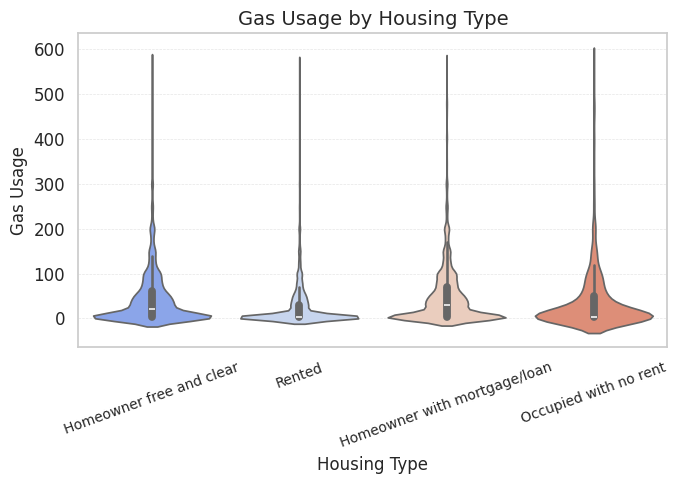

In [ ]:
# Gas usage by housing type
plt.figure(figsize=(7, 5))
sns.violinplot(x='housing_type', y='gas_usage', data=df, hue='housing_type', palette='coolwarm', legend=False)

plt.title('Gas Usage by Housing Type', fontsize=14)
plt.ylabel('Gas Usage', fontsize=12)
plt.xlabel('Housing Type', fontsize=12)
plt.xticks(rotation=20, fontsize=10)
plt.yticks(fontsize=12)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

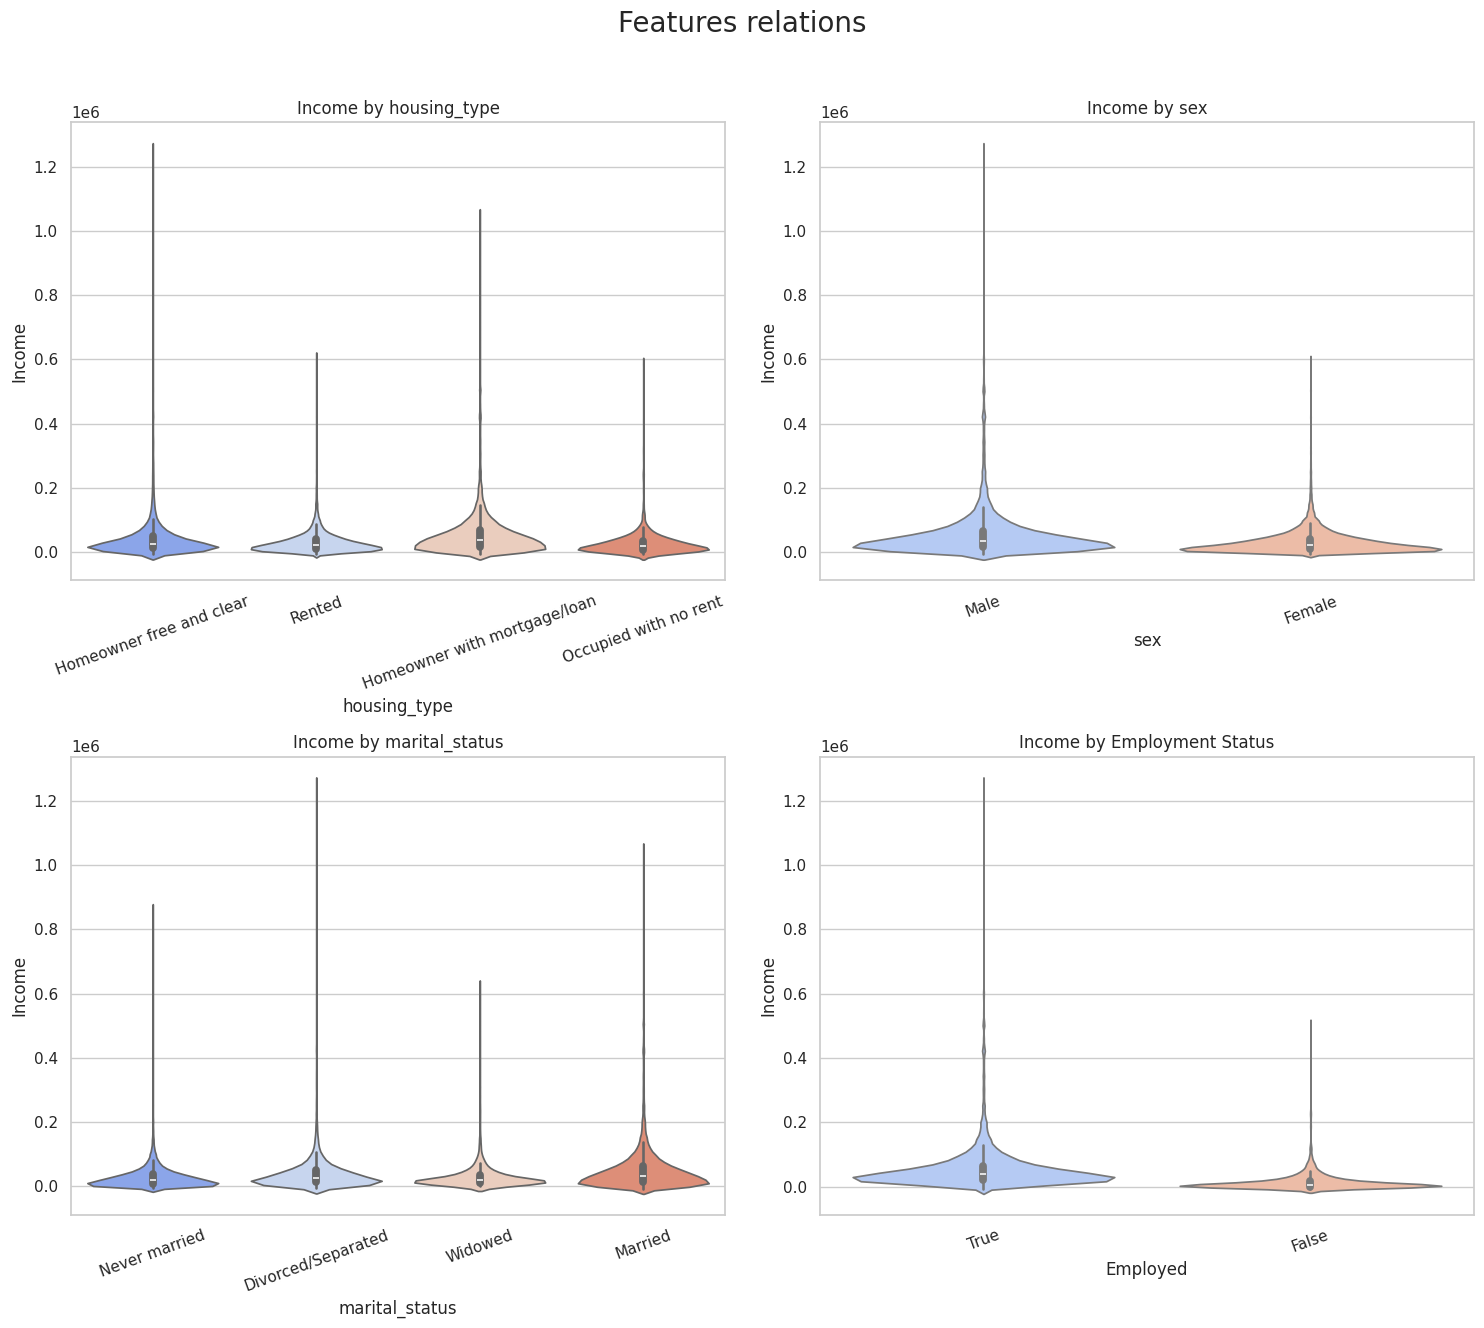

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(15, 13))
axes = axes.flatten()

# List of specific columns for violin plots
columns = ['housing_type', 'sex', 'marital_status']

# Iterate over the selected columns and create violin plots
for i, col in enumerate(columns):
    sns.violinplot(data=df, x=col, y='income', ax=axes[i], hue=col, palette='coolwarm', legend=False)
    axes[i].set_title(f'Income by {col}')
    axes[i].set_ylabel('Income')
    axes[i].set_xlabel(col)
    axes[i].tick_params(axis='x', rotation=20)

# Employment Status vs. Income
clear_df = df['is_employed'].dropna()
sns.violinplot(x=clear_df.astype(str), y='income', data=df, ax=axes[len(columns)], hue='is_employed', palette='coolwarm', legend=False)
axes[len(columns)].set_title('Income by Employment Status')
axes[len(columns)].set_xlabel('Employed')
axes[len(columns)].set_ylabel('Income')
axes[len(columns)].tick_params(axis='x', rotation=20)

plt.suptitle('Features relations', fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

In [ ]:
# Income grouped by employed status
print('Income grouped by employed status: ')
df.groupby('is_employed')['income'].describe()

Income grouped by employed status: 


,count,mean,std,min,25%,50%,75%,max
is_employed,,,,,,,,
False,2313.0,15162.649805,30479.714479,-6000.0,0.0,6000.0,19000.0,506000.0
True,44630.0,55645.097692,65425.481034,-6900.0,21900.0,39600.0,65400.0,1257000.0


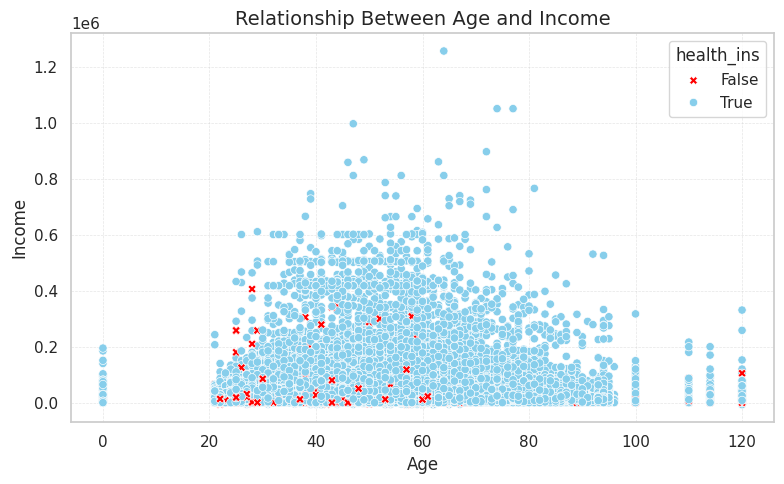

In [ ]:
# Age and Income relationship
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df,
    x='age',
    y='income',
    style='health_ins',
    hue='health_ins',
    markers={True: 'o', False: 'X'},
    palette={True: 'skyblue', False: 'red'}
)

plt.title('Relationship Between Age and Income', fontsize = 14)
plt.xlabel('Age')
plt.ylabel('Income')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

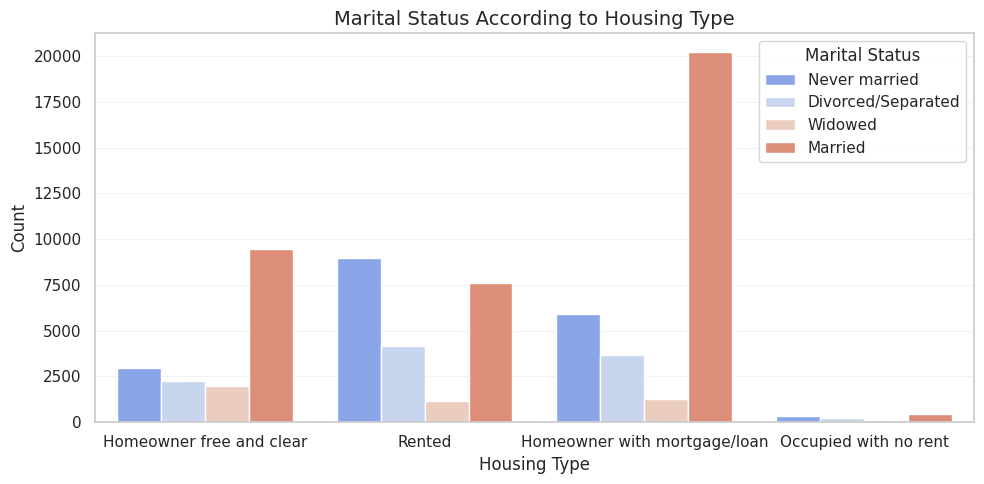

In [ ]:
# Bar chart for the Marital Status by Housing Type
plt.figure(figsize=(10,5))

sns.countplot(data=df, x='housing_type', hue='marital_status', palette='coolwarm')

plt.title('Marital Status According to Housing Type', fontsize = 14)
plt.xlabel('Housing Type')
plt.ylabel('Count')
plt.legend(title='Marital Status')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5, axis='y')

plt.tight_layout()
plt.show()

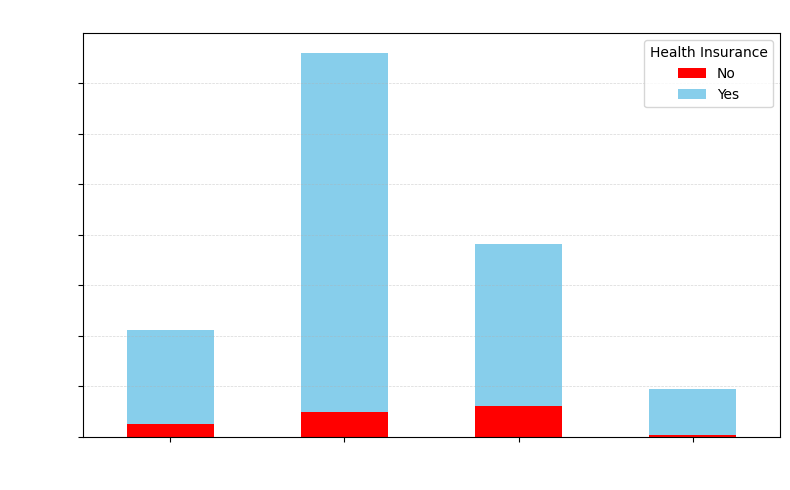

In [ ]:
# Stacked bar plot the Health Insurance by Marital Status

health_counts = df.groupby(['marital_status', 'health_ins']).size().unstack()
health_counts.plot(kind='bar', stacked=True, color=['red', 'skyblue'], figsize=(8,5))


plt.title('Health Insurance Distribution According to Marital Status', fontsize = 14, color='white')
plt.xlabel('Marital Status', color='white')
plt.ylabel('Count', color='white')
plt.legend(title='Health Insurance', labels=['No', 'Yes'])
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5, axis='y')
plt.xticks(rotation=0, color='white')
plt.yticks(color='white')

plt.tight_layout()
plt.show()

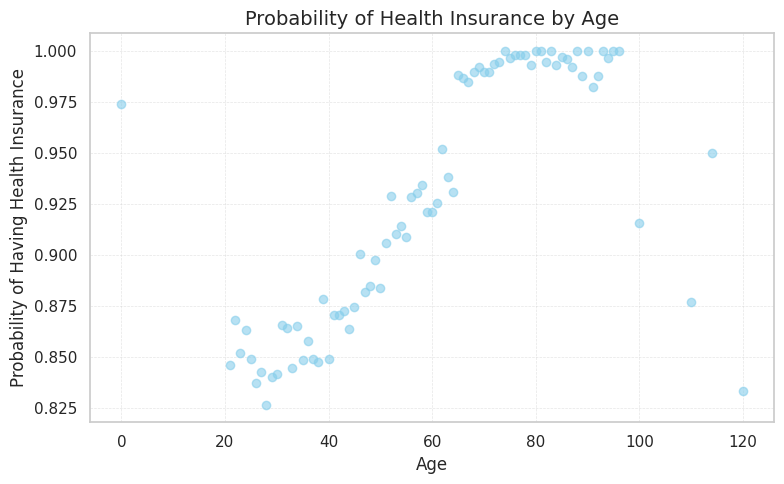

In [ ]:
# The probability of the Health Insurance by Age
prob_by_age = df.groupby('age')['health_ins'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.scatter(prob_by_age['age'], prob_by_age['health_ins'], color='skyblue', alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Probability of Having Health Insurance')
plt.title('Probability of Health Insurance by Age', fontsize = 14)
plt.grid(linestyle='--', linewidth=0.5, alpha=0.5)

plt.tight_layout()
plt.show()

## 2. Data preprocessing

### Data Processing summary

Data preprocessing was performed to prepare the data for building machine learning models. The following steps were undertaken:

1. Handling Missing Values:

*   housing_type: Missing values were replaced with the category "Unknown".
*   gas_usage: Missing values were imputed using the column median.
*   recent_move_b: Missing values were imputed using the column mode.
*   num_vehicles: Missing values were imputed using the column mean.
*   is_employed: Missing values were replaced with the category "NotWorkForce".

2. Standardizing Variable Types:

*   num_vehicles: Converted to integer type.
*   health_ins: Converted to integer type (1/0 for True/False).
*   sex: Mapped to numerical values (0/1 for Male/Female).
*   recent_move_b: Mapped to numerical values (0/1 for F/T).

3. One-Hot Encoding:

*   One-hot encoding was applied to categorical variables: **is_employed, marital_status, housing_type, and state_of_res**. This creates new columns with binary values (0/1) for each category.
4. Feature Elimination and Outlier Handling:

*   Irrelevant variables were removed: custid, code_column, and gas_usage.
*   Outliers in the age variable were removed, considering only individuals aged 18 or older.
*   A new variable, age_range, was created to group ages into ranges and one-hot encoded.

5. Data Scaling:

*   MinMaxScaler was used to scale the numerical variables income, num_vehicles, and rooms to the range [0, 1].

In [ ]:
import warnings
warnings.filterwarnings('ignore')

### 2.1 Handling Missing Values

In [ ]:
# Missing values handling

# housing type, replace na for 'Unknown' class
df['housing_type'].fillna('Unknown', inplace=True)

# gas usage, fill na values using median
df['gas_usage'].fillna(df['gas_usage'].median(), inplace=True)

# recent move, fill na values using mode
mode_recent_move = df['recent_move_b'].mode()[0] # save to use in test set
df['recent_move_b'].fillna(df['recent_move_b'].mode()[0], inplace=True)

# vehivles, fill na alues using mean
mean_vehicles = df['num_vehicles'].mean() # save to use in test set
df['num_vehicles'].fillna(df['num_vehicles'].mean(), inplace=True)

# is_employed, replace na for 'NotWorkForce' class
df['is_employed'].fillna('NotWorkForce', inplace=True)

<ipython-input-118-169246b31853>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['housing_type'].fillna('Unknown', inplace=True)
<ipython-input-118-169246b31853>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

### 2.2 Standarization of Features Types

In [ ]:
# Changing data types
df.num_vehicles = df.num_vehicles.astype(int) # num of vehicles into int
df.health_ins = df.health_ins.astype(int) # bool healts_ins from True/False to 1/0
df.sex = df.sex.map({'Male': 0, 'Female': 1}) # bool sex from Female/Male to 1/0
df.recent_move_b = df.recent_move_b.map({'F':0, 'T':1}) # bool recent_move_b from T/F to 1/0

In [ ]:
# One hot coding for some features
df = pd.get_dummies(df, columns=['is_employed'], prefix='employment_s', drop_first=True)
df = pd.get_dummies(df, columns=['marital_status'], prefix='marital_s')
df = pd.get_dummies(df, columns=['housing_type'], prefix='housing_type')
df = pd.get_dummies(df, columns=['state_of_res'], prefix='state')

### 2.3 Dropping Features & Outliers


In [ ]:
# Dropping irrelevant features
df.drop(['custid', 'code_column', 'gas_usage'], axis=1, inplace=True)

In [ ]:
# Dropping age outliers, age lower than 18
age_min = 18
df = df[(df.age >= age_min)]

In [ ]:
# Second option: create age ranges

# Define age bins and labels
bins = [21, 30, 40, 60, 80, 120]  # Customize as needed
labels = ['21-30', '31-40', '41-60', '61-80', '80+']

# Create a new column for age ranges
df['age_range'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)
df.drop(['age'], axis=1, inplace=True)

,sex,income,health_ins,num_vehicles,rooms,recent_move_b,employment_s_True,employment_s_NotWorkForce,marital_s_Divorced/Separated,marital_s_Married,...,state_Tennessee,state_Texas,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,age_range
0,0,22000.0,1,0,3,0,True,False,False,False,...,False,False,False,False,False,False,False,False,False,21-30
1,1,23200.0,1,0,6,1,False,True,True,False,...,False,False,False,False,False,False,False,False,False,80+


In [ ]:
# One hot coding for age range
df = pd.get_dummies(df, columns=['age_range'], prefix='age_', drop_first=False)

### 2.4 Data Scaling (MiniMaxScaler)

In [ ]:
# Scaling numerical features
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# df.income = scaler.fit_transform(df[['income']])
# df.num_vehicles = scaler.fit_transform(df[['num_vehicles']])
# df.age = scaler.fit_transform(df[['age']])
# df.rooms = scaler.fit_transform(df[['rooms']])

scaler = MinMaxScaler()
# scaler.fit(df[['income', 'num_vehicles', 'age', 'rooms']])
# df[['income', 'num_vehicles', 'age', 'rooms']] = scaler.transform(df[['income', 'num_vehicles', 'age', 'rooms']])

scaler.fit(df[['income', 'num_vehicles', 'rooms']])
df[['income', 'num_vehicles', 'rooms']] = scaler.transform(df[['income', 'num_vehicles', 'rooms']])

In [ ]:
# SAVING PREPROCESSED DATA
# from google.colab import files

# # Save DataFrame as CSV
# df.to_csv('preprocessed_customer_age_ranges.csv', index=False)

# # Download the CSV file
# files.download('preprocessed_customer_age_ranges.csv')

## 3. Models Building and Evaluation

###Data blancing summary

The original dataset has an imbalance in the target variable (health_ins), with more insured individuals than uninsured. This can lead to biased models that perform poorly on the minority class

To address this imbalance and improve model performance on both classes We have explored

*   Random Undersampling
*   Random Oversampling
*   SMOTE (Synthetic Minority Over-sampling Technique)

###Modeling summary
*   K-Nearest Neighbors (KNN): This model classifies data points based on the majority class among their nearest neighbors. The code uses GridSearchCV to find the optimal hyperparameters (like the number of neighbors and weighting scheme) for the KNN model. Performance is evaluated using the F1 score and a confusion matrix.

*   Naive Bayes: This model uses Bayes' theorem to calculate the probability of a data point belonging to each class, assuming feature independence. The code uses GaussianNB for continuous features and evaluates performance using the F1 score, a confusion matrix, and a classification report.

*   Decision Tree: This model builds a tree-like structure to make decisions based on feature values. The code uses DecisionTreeClassifier and GridSearchCV to find the best hyperparameters (such as maximum depth, minimum samples per leaf, and minimum samples per split) to optimize the F1 score.

*   Support Vector Machine (SVM): This model aims to find the best hyperplane that separates data points into different classes. The code uses SVC and GridSearchCV to explore different kernels (linear, RBF, polynomial) and regularization parameters (C) to optimize the F1 score. The code also tests the SVM with different data balancing techniques (imbalanced, undersampled, oversampled, and SMOTE) and evaluates their performance.

*   Neural Network: This model uses interconnected layers of nodes to learn complex patterns in the data. The code uses tensorflow.keras to build a sequential model with dense layers, dropout for regularization, and the Adam optimizer. The model is evaluated using accuracy, loss, and a classification report. Different architectures are explored for each data balancing technique (imbalanced, undersampled, oversampled, and SMOTE).





### 3.1 Data Balancing

#### Non-balanced Data

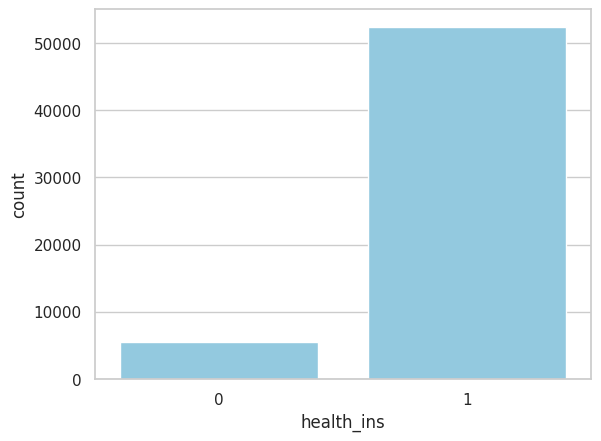

In [ ]:
from sklearn.model_selection import train_test_split

# Shuffling
shuffled_df = df.sample(frac=1, random_state=42).reset_index(drop=True)

X = shuffled_df.drop('health_ins', axis=1)
y = shuffled_df['health_ins']

# Split the data into training and validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_data = pd.concat([X_train, y_train], axis=1) # training dataset

sns.countplot(data=train_data, x='health_ins', color='skyblue')

# Separate majority and minority classes in the training set
df_majority = train_data[train_data.health_ins == 1]
df_minority = train_data[train_data.health_ins == 0]


Results for non-balanced data

#### Balanced Data

<Axes: xlabel='health_ins', ylabel='count'>

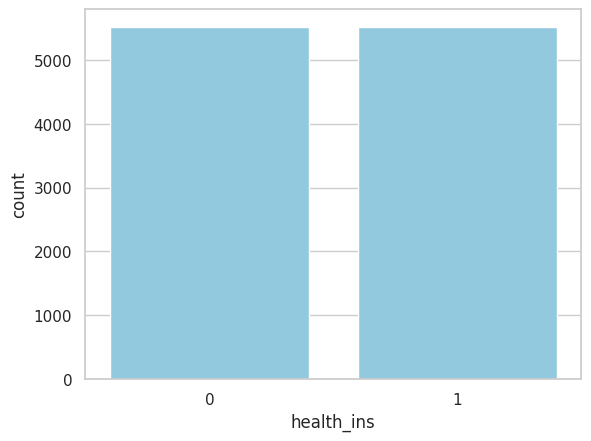

In [ ]:
# Random Undersampling
from sklearn.utils import resample


df_majority_downsampled = resample(df_majority,
                                   replace=False,
                                   n_samples=len(df_minority),
                                   random_state=123)

undersampled_df = pd.concat([df_majority_downsampled, df_minority])
sns.countplot(data=undersampled_df, x='health_ins', color='skyblue')

<Axes: xlabel='health_ins', ylabel='count'>

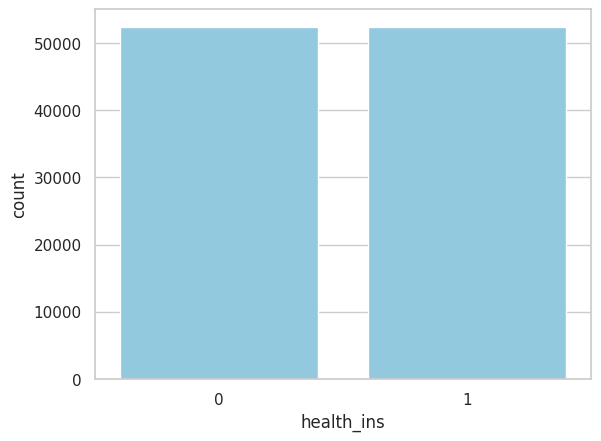

In [ ]:
# Random Oversampling
df_minority_upsampled = resample(df_minority,
                                 replace=True,
                                 n_samples=len(df_majority),
                                 random_state=123)

oversampled_df = pd.concat([df_majority, df_minority_upsampled])
sns.countplot(data=oversampled_df, x='health_ins', color='skyblue')

<Axes: xlabel='health_ins', ylabel='count'>

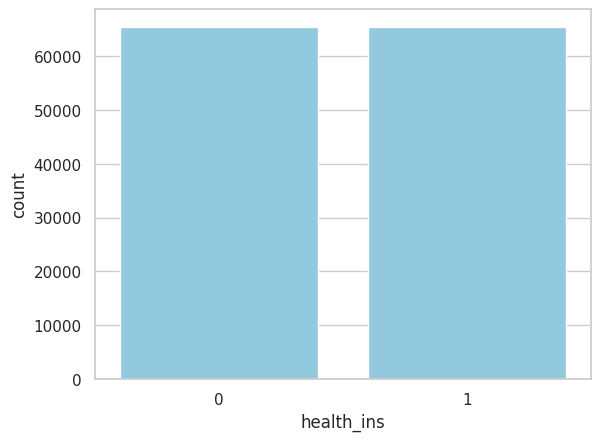

In [ ]:
# Synthetic Minority Over-sampling Technique (SMOTE)
from imblearn.over_sampling import SMOTE

X = df.drop('health_ins', axis=1)
y = df['health_ins']

smote = SMOTE(random_state=123)
X_resampled, y_resampled = smote.fit_resample(X, y)

smote_df = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['health_ins'])], axis=1)
sns.countplot(data=smote_df, x='health_ins', color='skyblue')

In [ ]:
#Here you can comment/uncomment which sampling technique you want to use

# Non balanced data
#X_train = train_data.drop('health_ins', axis=1)
#y_train = train_data['health_ins']

# Random undersampling
#X_train = undersampled_df.drop('health_ins', axis=1)
#y_train = undersampled_df['health_ins']

# Random oversampling
#X_train = oversampled_df.drop('health_ins', axis=1)
#y_train = oversampled_df['health_ins']

# SMOTE
X_train = smote_df.drop('health_ins', axis=1)
y_train = smote_df['health_ins']

### 3.2 Models

#### K-Nearest Neighbors (KNN)

Best params: KNeighborsClassifier(n_neighbors=9)
Best KNN F1 Score (CV): 0.949
              precision    recall  f1-score   support

           0       0.47      0.07      0.12      1381
           1       0.91      0.99      0.95     13096

    accuracy                           0.90     14477
   macro avg       0.69      0.53      0.53     14477
weighted avg       0.87      0.90      0.87     14477

Predicted    0      1
Actual               
0           95   1286
1          109  12987


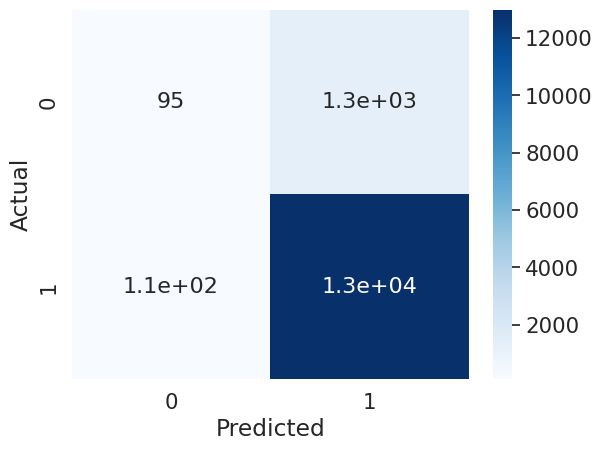

In [ ]:
# K-Nearest Neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer, confusion_matrix, classification_report


# GridSearchCV with KNN model
f1_scorer = make_scorer(f1_score)

knn_param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}

knn_grid_search = GridSearchCV(KNeighborsClassifier(), knn_param_grid, scoring=f1_scorer, cv=5)
knn_grid_search.fit(X_train, y_train)

knn_best_params = knn_grid_search.best_params_
knn_best_model = knn_grid_search.best_estimator_


print("Best params:", knn_best_model)

y_pred = knn_best_model.predict(X_val)

f1 = f1_score(y_val, y_pred)
print(f'Best KNN F1 Score (CV): {f1:.3f}')

print(classification_report(y_val,y_pred))

conf_mat = confusion_matrix(y_val,y_pred)
conf_mat = pd.DataFrame(conf_mat)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_mat, cmap="Blues", annot=True,annot_kws={"size": 16})# font size


print(conf_mat)

#### Naive Bayes

Naive Bayes F1 Score: 0.70
              precision    recall  f1-score   support

           0       0.15      0.78      0.26      1381
           1       0.96      0.55      0.70     13096

    accuracy                           0.57     14477
   macro avg       0.56      0.67      0.48     14477
weighted avg       0.88      0.57      0.66     14477

Predicted     0     1
Actual               
0          1082   299
1          5918  7178


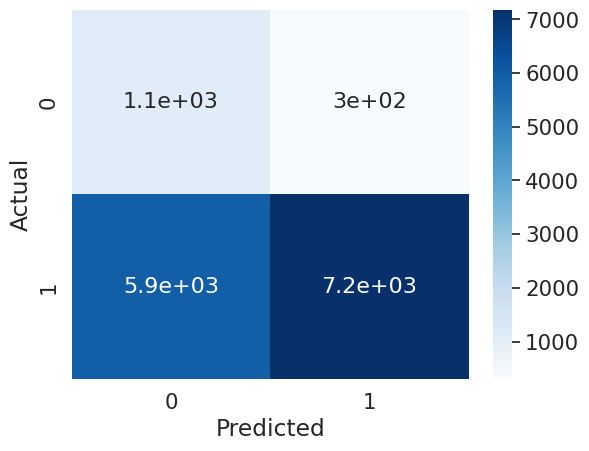

In [ ]:
# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_val)
nb_f1 = f1_score(y_val, y_pred_nb)
print(f'Naive Bayes F1 Score: {nb_f1:.2f}')

print(classification_report(y_val,y_pred_nb))

conf_mat = confusion_matrix(y_val,y_pred_nb)
conf_mat = pd.DataFrame(conf_mat)
conf_mat.index.name = 'Actual'
conf_mat.columns.name = 'Predicted'
sns.set(font_scale=1.4)#for label size
sns.heatmap(conf_mat, cmap="Blues", annot=True,annot_kws={"size": 16})# font size

print(conf_mat)

#### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer, classification_report
from sklearn.model_selection import GridSearchCV

decision_tree_model = DecisionTreeClassifier()

param_grid = {
    'max_depth': [5,7,10,None],
    'min_samples_leaf': [2,3,5,10],
    'min_samples_split': [1,2,5,7]
}

f1_scorer = make_scorer(f1_score)

grid_search = GridSearchCV(decision_tree_model, param_grid, cv=5, scoring=f1_scorer)
grid_search.fit(X_train, y_train)

best_dt_params = grid_search.best_params_
best_dt_model = grid_search.best_estimator_
print("Best params:", best_dt_params)

y_pred_dt = best_dt_model.predict(X_val)
# dt_f1 = f1_score(y_val, y_pred_dt)
# print(f'Decision Tree F1 Score: {dt_f1:.3f}')
print(classification_report(y_val,y_pred_dt))

Best params: {'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.16      0.85      0.28      1381
           1       0.97      0.54      0.70     13096

    accuracy                           0.57     14477
   macro avg       0.57      0.70      0.49     14477
weighted avg       0.90      0.57      0.66     14477



#### Support Vector Machine (SVM)

Attention: just code without execution, model was build and evaluated in the local notebook.

In [ ]:
# SVM Model
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Implementing SVM model
svm_model = SVC()

# Setting params for SVM Algorithm
svm_param_grid = {
    'kernel': ['linear', 'rbf', 'poly'], # Different kernels check
    'C': [0.1, 1, 10],                   # Regularization parameter check
    'gamma': ['scale', 'auto', 0.1],     # Kernel coefficient check
    'degree': [2, 3, 4],                 # Degree of the polynomial kernel function check
    'class_weight': [None, 'balanced'],  # Class weight adjustment
}

In [ ]:
# Grid Search configuration with Cross Validation
svm_grid_search = GridSearchCV(svm_model, svm_param_grid, cv=5, scoring='f1', n_jobs=-1)

# Imbalanced Dataset
X, _, y, _ = train_test_split(X_train, y_train, train_size=0.1, random_state=42)  # Sampling, using just 10% of the training data to accelerate GridSearch
svm_grid_search.fit(X, y)
print("Best params:", svm_grid_search.best_params_)
print("Best f1-score:", svm_grid_search.best_score_)

In [ ]:
# Undersampled Dataset
X, _, y, _ = train_test_split(X_1, y_1, train_size=0.6, random_state=42)
svm_grid_search.fit(X, y)
print("Best params:", svm_grid_search.best_params_)
print("Best f1-score:", svm_grid_search.best_score_)

In [ ]:
# Oversampled Dataset
X, _, y, _ = train_test_split(X_2, y_2, train_size=0.1, random_state=42)
svm_grid_search.fit(X, y)
print("Best params:", svm_grid_search.best_params_)
print("Best f1-score:", svm_grid_search.best_score_)

In [ ]:
# SMOTE Dataset
X, _, y, _ = train_test_split(X_3, y_3, train_size=0.06, random_state=42)
svm_grid_search.fit(X, y)
print("Best params:", svm_grid_search.best_params_)
print("Best f1-score:", svm_grid_search.best_score_)

In [ ]:
# Using the best parameter to train models for each example
# imbalanced
svm_model_im = SVC(kernel = 'poly', C = 10, gamma = 0.1, degree = 3, class_weight = None)
svm_model_im.fit(X_train, y_train)
# undersampled dataset
svm_model_us = SVC(kernel = 'linear', C = 10, gamma = 'scale', degree = 2, class_weight = 'balanced')
svm_model_us.fit(X_1, y_1)
# oversampled dataset
svm_model_os = SVC(C = 10, class_weight = None, degree = 2, gamma = 'scale', kernel = 'rbf')
svm_model_os.fit(X_2, y_2)
# SMOTE dataset
svm_model_sm = SVC(C = 10, class_weight = 'balanced', degree = 2, gamma = 'scale', kernel = 'linear')
svm_model_sm.fit(X_3, y_3)

In [ ]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report )

# Function to estimate model evaluation metrics
def eval_metrics(y_pred, y_real, example_name):
    # Count metrics
    accuracy = accuracy_score(y_real, y_pred)
    precision = precision_score(y_real, y_pred, average='weighted')
    recall = recall_score(y_real, y_pred, average='weighted')
    f1 = f1_score(y_real, y_pred, average='weighted')
    # Print metrics
    print(f'Example: {example_name}')
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    # Confusion matrix
    cm = confusion_matrix(y_real, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show()
    # Clasification report
    print('Classsification report')
    print(classification_report(y_real,y_pred))

In [ ]:
# Checking results on validation data
# imbalanced
y_pred_v_im = svm_model_im.predict(X_val)
eval_metrics(y_pred_v_im, y_val, 'imbalanced')
# undersampled
y_pred_v_us = svm_model_us.predict(X_val)
eval_metrics(y_pred_v_us, y_val, 'undersampled')
# oversampled
y_pred_v_os = svm_model_os.predict(X_val)
eval_metrics(y_pred_v_os, y_val, 'oversampled')
# SMOTE
y_pred_v_sm = svm_model_sm.predict(X_val)
eval_metrics(y_pred_v_sm, y_val, 'SMOTE')

#### Neural Network
Attention: just code without execution, model was build and evaluated in the local notebook.

In [ ]:
# Neural Networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

In [ ]:
# Evaluation Function
def evaluate_model_nn(y_val, y_pred, history):
    print("Classification Report:")
    print(classification_report(y_val, y_pred))

    accuracy = history.history['accuracy']
    val_accuracy = history.history.get('val_accuracy', [])
    loss = history.history['loss']
    val_loss = history.history.get('val_loss', [])
    epochs = range(1, len(accuracy) + 1)

    plt.figure(figsize=(10, 5))

    plt.subplot(2, 2, 1)
    plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
    plt.title('Training Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 2, 2)
    if val_accuracy:
        plt.plot(epochs, val_accuracy, 'g', label='Validation Accuracy')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(2, 2, 3)
    plt.plot(epochs, loss, 'r', label='Training Loss')
    plt.title('Training Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.subplot(2, 2, 4)
    if val_loss:
        plt.plot(epochs, val_loss, 'orange', label='Validation Loss')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

In [ ]:
# Build model for imbalanced
nn_model_im = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
# Compile model
nn_model_im.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Fit model
history_im = nn_model_im.fit(X_train, y_train, epochs=30, batch_size=32, verbose=1, validation_data=(X_val, y_val))
# Imbalanced model eval
y_pred_probs_im = nn_model_im.predict(X_val)
y_pred_im = (y_pred_probs_im > 0.5).astype(int)

evaluate_model_nn(y_val, y_pred_im, history_im)

In [ ]:
# Build model for undersampled
nn_model_us = Sequential([
    Input(shape=(X_1.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(32, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
# Compile model
nn_model_us.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Fit model
history_us = nn_model_us.fit(X_1, y_1, epochs=20, batch_size=32, verbose=1, validation_data=(X_val, y_val))
# Undersampled model eval
y_pred_probs_us = nn_model_us.predict(X_val)
y_pred_us = (y_pred_probs_us > 0.5).astype(int)

evaluate_model_nn(y_val, y_pred_us, history_us)

In [ ]:
# Build model for oversampled
nn_model_os = Sequential([
    Input(shape=(X_2.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
# Compile model
nn_model_os.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Fit model
history_os = nn_model_os.fit(X_2, y_2, epochs=20, batch_size=32, verbose=1, validation_data=(X_val, y_val))
# Evaluate
y_pred_probs_os = nn_model_os.predict(X_val)
y_pred_os = (y_pred_probs_os > 0.5).astype(int)
evaluate_model_nn(y_val, y_pred_os, history_os)

In [ ]:
# Build model for SMOTE
nn_model_sm = Sequential([
    Input(shape=(X_3.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.2),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])
# Compile model
nn_model_sm.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Fit model
history_sm = nn_model_sm.fit(X_3, y_3, epochs=20, batch_size=64, verbose=1, validation_data=(X_val, y_val))
# Evaluate
y_pred_probs_sm = nn_model_sm.predict(X_val)
y_pred_sm = (y_pred_probs_sm > 0.5).astype(int)
evaluate_model_nn(y_val, y_pred_sm, history_sm)

### 3.3 Ensamble Models

#### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

random_forest_model = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(100, 300),  # Randomly sample between 50 and 200
    'max_depth': [None] + list(range(10, 110, 10)),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False],
}


def make_random_search(model, param_distributions):
    return RandomizedSearchCV(
        model,
        param_distributions,
        n_iter=50,
        cv=3,
        scoring='f1',
        random_state=42
    )

random_search = make_random_search(random_forest_model, param_dist)
random_search.fit(X_train, y_train)

print("Best Hyperparameters:", random_search.best_params_)

best_random_forest_model = random_search.best_estimator_
y_pred_rf = best_random_forest_model.predict(X_val)

# rf_f1 = f1_score(y_val, y_rf_pred)
# print(f'Random Forest F1 Score: {rf_f1:.3f}')
print(classification_report(y_val,y_pred_rf))

Best Hyperparameters: {'max_depth': 50, 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 214}
              precision    recall  f1-score   support

           0       0.59      0.79      0.67      1381
           1       0.98      0.94      0.96     13096

    accuracy                           0.93     14477
   macro avg       0.78      0.87      0.82     14477
weighted avg       0.94      0.93      0.93     14477



,0
income,0.198519
num_vehicles,0.146017
rooms,0.098626
age__61-80,0.051037
sex,0.037109
state_Texas,0.035588
housing_type_Rented,0.031153
housing_type_Homeowner with mortgage/loan,0.025137
marital_s_Never married,0.023647
age__80+,0.022451


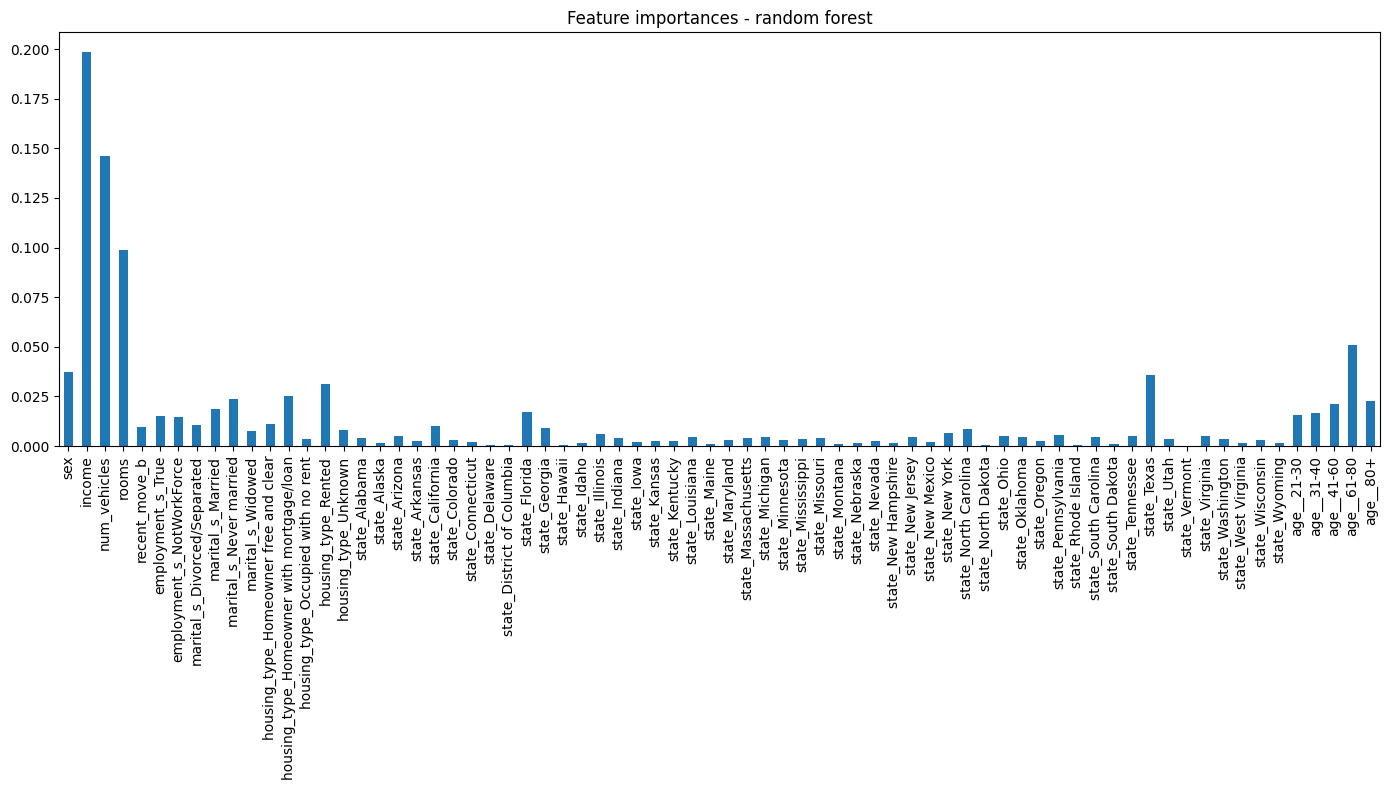

In [ ]:
# Feature importances
feature_importances_rf = pd.Series(best_random_forest_model.feature_importances_, index=X_train.columns)
display(feature_importances_rf.sort_values(ascending=False).head(15))

fig, ax = plt.subplots(figsize=(14,8))
feature_importances_rf.plot.bar(ax=ax)
ax.set_title("Feature importances - random forest")
fig.tight_layout()

#### XGBoost

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

# Define the hyperparameter grid
param_distributions = {
    'n_estimators': randint(200, 900),               # Number of trees
    'max_depth': randint(5, 15),                     # Tree depth
    'learning_rate': uniform(0.01, 0.3),             # Learning rate
    'min_child_weight': randint(1, 8),              # Min child weight
    'gamma': uniform(0, 5),                          # Minimum loss reduction
    'subsample': uniform(0.5, 0.5),                  # Subsample ratio
    'colsample_bytree': uniform(0.5, 0.5),           # Feature subsampling
    'reg_alpha': uniform(0, 10),                     # L1 regularization
    'reg_lambda': uniform(0, 10),                    # L2 regularization
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:", random_search.best_params_)
print("Best F1 Score from CV:", random_search.best_score_)

best_model_xgb = random_search.best_estimator_

y_pred_xgb = best_model_xgb.predict(X_val)
# test_f1 = f1_score(y_val, y_pred)
# print("F1 Score on Test Data:", test_f1)
print(classification_report(y_val,y_pred_xgb))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'colsample_bytree': 0.8607982753756386, 'gamma': 0.24047321982043846, 'learning_rate': 0.24445434452542447, 'max_depth': 13, 'min_child_weight': 5, 'n_estimators': 469, 'reg_alpha': 7.995371309195156, 'reg_lambda': 8.251326766927972, 'subsample': 0.593202493394072}
Best F1 Score from CV: 0.41784223099884565
              precision    recall  f1-score   support

           0       0.58      0.38      0.46      1381
           1       0.94      0.97      0.95     13096

    accuracy                           0.91     14477
   macro avg       0.76      0.67      0.71     14477
weighted avg       0.90      0.91      0.91     14477



In [ ]:
# XGBoost: non-balanced data with specifying imbalance ratio

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
from scipy.stats import uniform, randint

X_train_xgb = train_data.drop('health_ins', axis=1)
y_train_xgb = train_data['health_ins']

imbal_ratio = sum(df.health_ins==0)/sum(df.health_ins==1)

# Hyperparameter grid
param_distributions = {
    'n_estimators': randint(200, 900),               # Number of trees
    'max_depth': randint(5, 15),                     # Tree depth
    'learning_rate': uniform(0.01, 0.3),             # Learning rate
    'min_child_weight': randint(1, 8),              # Min child weight
    'gamma': uniform(0, 5),                          # Minimum loss reduction
    'subsample': uniform(0.5, 0.5),                  # Subsample ratio
    'colsample_bytree': uniform(0.5, 0.5),           # Feature subsampling
    'reg_alpha': uniform(0, 10),                     # L1 regularization
    'reg_lambda': uniform(0, 10),                    # L2 regularization
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=imbal_ratio) # add imbalance ratio

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_distributions,
    n_iter=100,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train_xgb, y_train_xgb)

print("Best Parameters:", random_search.best_params_)
print("Best F1 Score from CV:", random_search.best_score_)

xgb_best_model = random_search.best_estimator_

y_pred_xgb2 = xgb_best_model.predict(X_val)
# test_f1 = f1_score(y_val, y_pred_xgb2)
# print("F1 Score on Test Data:", test_f1)
print(classification_report(y_val,y_pred_xgb2))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'colsample_bytree': 0.6738096072413418, 'gamma': 0.15902340742582566, 'learning_rate': 0.1746145927622226, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 723, 'reg_alpha': 2.063337184057925, 'reg_lambda': 3.6426986104807546, 'subsample': 0.7517086354274285}
Best F1 Score from CV: 0.8497321518459622
              precision    recall  f1-score   support

           0       0.23      0.70      0.35      1381
           1       0.96      0.75      0.85     13096

    accuracy                           0.75     14477
   macro avg       0.60      0.73      0.60     14477
weighted avg       0.89      0.75      0.80     14477



### 3.4 Other Stategies

#### Voting

The idea is to combine predictions of multiple individual models to produce the final optimum solution.

In [ ]:
pred_1 = y_pred_xgb2
pred_2 = y_pred_xgb
pred_3 = y_pred_rf

In [ ]:
pred_1

array([1, 1, 0, ..., 0, 1, 1])

In [ ]:
# df_concated = pd.concat([pred_1.health_ins,pred_2.health_ins,pred_3.health_ins],axis=1)
df_concated = pd.DataFrame({1:pred_1,2:pred_2,3:pred_3})
df_concated.head(5)

,1,2,3
0,1,1,1
1,1,1,1
2,0,0,0
3,1,1,1
4,1,1,1


In [ ]:
pred_all = df_concated.mode(axis=1)
final_pred = pd.DataFrame({'custid': df_test.custid, 'health_ins': pred_all[0]})

## 4. Model Usage

### Test set preprocessing

In [ ]:
df_test = pd.read_csv('customer_test_masked.csv')
df_test.head(5)

,Unnamed: 0,custid,sex,is_employed,income,marital_status,health_ins,housing_type,num_vehicles,age,state_of_res,code_column,gas_usage,rooms,recent_move_b
0,4523,001115999_01,Male,NaN,28900.0,Married,NaN,Homeowner free and clear,1.0,82,Arkansas,653,20.0,6,F
1,58780,000566299_01,Male,True,40000.0,Never married,NaN,Rented,1.0,40,New Mexico,404,40.0,5,T
2,18628,001397329_01,Female,True,203000.0,Married,NaN,Homeowner with mortgage/loan,3.0,54,Colorado,1291,80.0,2,F
3,11525,000843100_01,Female,NaN,0.0,Married,NaN,Homeowner free and clear,1.0,64,California,8962,30.0,2,F
4,56266,000260071_03,Male,True,40000.0,Married,NaN,Homeowner with mortgage/loan,4.0,35,New Jersey,2059,150.0,1,F


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      804 non-null    int64  
 1   custid          804 non-null    object 
 2   sex             804 non-null    object 
 3   is_employed     545 non-null    object 
 4   income          804 non-null    float64
 5   marital_status  804 non-null    object 
 6   health_ins      0 non-null      float64
 7   housing_type    770 non-null    object 
 8   num_vehicles    770 non-null    float64
 9   age             804 non-null    int64  
 10  state_of_res    804 non-null    object 
 11  code_column     804 non-null    int64  
 12  gas_usage       770 non-null    float64
 13  rooms           804 non-null    int64  
 14  recent_move_b   770 non-null    object 
dtypes: float64(4), int64(4), object(7)
memory usage: 94.3+ KB


In [ ]:
df_test.describe()

,Unnamed: 0,income,health_ins,num_vehicles,age,code_column,gas_usage,rooms
count,804.000000,804.000000,0.0,770.000000,804.000000,804.000000,770.000000,804.000000
mean,50189.932836,31194.060945,NaN,1.944156,45.185323,3370.618159,35.628571,3.500000
std,29169.957072,39738.597914,NaN,1.167727,16.968559,2648.044549,53.264726,1.726289
min,26.000000,0.000000,NaN,0.000000,21.000000,131.000000,1.000000,1.000000
25%,24497.750000,6000.000000,NaN,1.000000,31.000000,1305.000000,3.000000,2.000000
50%,51142.500000,20650.000000,NaN,2.000000,43.000000,2357.000000,3.000000,3.000000
75%,75297.500000,40000.000000,NaN,2.000000,57.000000,4979.000000,50.000000,5.000000
max,99889.000000,406000.000000,NaN,6.000000,114.000000,8962.000000,460.000000,6.000000


In [ ]:
#1. Missing values handling
# housing type, replace na for 'Unknown' class
df_test['housing_type'].fillna('Unknown', inplace=True)
# gas usage, fill na values using median
df_test['gas_usage'].fillna(df_test['gas_usage'].median(), inplace=True)
# recent move, fill na values using mode
mode_recent_move = df['recent_move_b'].mode()[0] # save to use in test set
df_test['recent_move_b'].fillna(df_test['recent_move_b'].mode()[0], inplace=True)
# vehivles, fill na alues using mean
mean_vehicles = df['num_vehicles'].mean() # save to use in test set
df_test['num_vehicles'].fillna(df_test['num_vehicles'].mean(), inplace=True)
# is_employed, replace na for 'NotWorkForce' class
df_test['is_employed'].fillna('NotWorkForce', inplace=True)

In [ ]:
#2.Changing data types
df_test.num_vehicles = df_test.num_vehicles.astype(int) # num of vehicles into int
df_test.sex = df_test.sex.map({'Male': 0, 'Female': 1}) # bool sex from Female/Male to 1/0
df_test.recent_move_b = df_test.recent_move_b.map({'F':0, 'T':1}) # bool recent_move_b from T/F to 1/0

In [ ]:
#One hot coding for some features
df_test = pd.get_dummies(df_test, columns=['is_employed'], prefix='employment_s', drop_first=True)
df_test = pd.get_dummies(df_test, columns=['marital_status'], prefix='marital_s')
df_test = pd.get_dummies(df_test, columns=['housing_type'], prefix='housing_type')
df_test = pd.get_dummies(df_test, columns=['state_of_res'], prefix='state')

In [ ]:
# Second option: create age ranges
df_test['age_range'] = pd.cut(df_test['age'], bins=bins, labels=labels, right=False)
df_test.drop(['age'], axis=1, inplace=True)
df_test = pd.get_dummies(df_test, columns=['age_range'], prefix='age_', drop_first=False)
display(df_test)

,Unnamed: 0,custid,sex,income,health_ins,num_vehicles,code_column,gas_usage,rooms,recent_move_b,...,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,age__21-30,age__31-40,age__41-60,age__61-80,age__80+
0,4523,001115999_01,0,28900.0,NaN,1,653,20.0,6,0,...,False,False,False,False,False,False,False,False,False,True
1,58780,000566299_01,0,40000.0,NaN,1,404,40.0,5,1,...,False,False,False,False,False,False,False,True,False,False
2,18628,001397329_01,1,203000.0,NaN,3,1291,80.0,2,0,...,False,False,False,False,False,False,False,True,False,False
3,11525,000843100_01,1,0.0,NaN,1,8962,30.0,2,0,...,False,False,False,False,False,False,False,False,True,False
4,56266,000260071_03,0,40000.0,NaN,4,2059,150.0,1,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799,67129,000961606_04,0,0.0,NaN,1,2357,20.0,6,0,...,False,False,False,False,False,False,True,False,False,False
800,94399,001063357_01,1,160000.0,NaN,2,1942,150.0,3,0,...,True,False,False,False,False,False,False,True,False,False
801,40764,000613999_02,0,0.0,NaN,1,1104,3.0,1,0,...,False,False,False,False,False,True,False,False,False,False
802,42186,000087463_03,1,0.0,NaN,4,1337,3.0,3,1,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Scaling numerical features - using the same scaler fitted on the train set
# df_test[['income', 'num_vehicles', 'age', 'rooms']] = scaler.transform(df_test[['income', 'num_vehicles', 'age', 'rooms']])
df_test[['income', 'num_vehicles', 'rooms']] = scaler.transform(df_test[['income', 'num_vehicles', 'rooms']])

In [ ]:
df_test.head(5)

,Unnamed: 0,custid,sex,income,health_ins,num_vehicles,code_column,gas_usage,rooms,recent_move_b,...,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming,age__21-30,age__31-40,age__41-60,age__61-80,age__80+
0,4523,001115999_01,0,0.028325,NaN,0.166667,653,20.0,1.0,0,...,False,False,False,False,False,False,False,False,False,True
1,58780,000566299_01,0,0.037107,NaN,0.166667,404,40.0,0.8,1,...,False,False,False,False,False,False,False,True,False,False
2,18628,001397329_01,1,0.166073,NaN,0.500000,1291,80.0,0.2,0,...,False,False,False,False,False,False,False,True,False,False
3,11525,000843100_01,1,0.005459,NaN,0.166667,8962,30.0,0.2,0,...,False,False,False,False,False,False,False,False,True,False
4,56266,000260071_03,0,0.037107,NaN,0.666667,2059,150.0,0.0,0,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 75 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Unnamed: 0                                 804 non-null    int64  
 1   custid                                     804 non-null    object 
 2   sex                                        804 non-null    int64  
 3   income                                     804 non-null    float64
 4   health_ins                                 0 non-null      float64
 5   num_vehicles                               804 non-null    float64
 6   code_column                                804 non-null    int64  
 7   gas_usage                                  804 non-null    float64
 8   rooms                                      804 non-null    float64
 9   recent_move_b                              804 non-null    int64  
 10  employment_s_True         

In [ ]:
df_test.describe()

,Unnamed: 0,sex,income,health_ins,num_vehicles,code_column,gas_usage,rooms,recent_move_b
count,804.000000,804.000000,804.000000,0.0,804.000000,804.000000,804.000000,804.000000,804.000000
mean,50189.932836,0.467662,0.030140,NaN,0.317371,3370.618159,34.248756,0.500000,0.155473
std,29169.957072,0.499264,0.031441,NaN,0.193075,2648.044549,52.537364,0.345258,0.362580
min,26.000000,0.000000,0.005459,NaN,0.000000,131.000000,1.000000,0.000000,0.000000
25%,24497.750000,0.000000,0.010207,NaN,0.166667,1305.000000,3.000000,0.200000,0.000000
50%,51142.500000,0.000000,0.021798,NaN,0.333333,2357.000000,3.000000,0.400000,0.000000
75%,75297.500000,1.000000,0.037107,NaN,0.333333,4979.000000,50.000000,0.800000,0.000000
max,99889.000000,1.000000,0.326687,NaN,1.000000,8962.000000,460.000000,1.000000,1.000000


In [ ]:
# from google.colab import files

# # Save DataFrame as CSV
df_test.to_csv('preprocessed_customer_test_masked_age_ranges.csv', index=False)

# # Download the CSV file
#files.download('preprocessed_customer_test_masked_age_ranges.csv')
